


## Cleaning dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#from scipy.stats import norm

In [2]:
# Read the csv file
data = pd.read_csv('data.csv', encoding= 'unicode_escape')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Previewing the dataset

In [3]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
data.shape


(541909, 8)

In [5]:
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [6]:
data.describe()
# Negative values in [UnitPrice], [Quantity]

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Converting [InvoiceDate] to datetime type

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Getting year, month and my columns

data['Year'] = data['InvoiceDate'].dt.year.astype('str')
data['Month'] = data['InvoiceDate'].dt.month.astype('str')
data['MonthYear'] = data['Month'] + '/' + data['Year'] 
data.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,12/2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,12/2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12/2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12/2010


## Inspecting negative values in :

### [UnitPrice]

In [8]:
# 1A) Filtering negative values in [UnitPrice] as new dataframe

unit_price_negatives = data[data['UnitPrice']< 0]
unit_price_negatives.head(5)

# Stock Code = B
# Description = Adjust bad debt
# UnitPrice = -11062.06 $
# CustomerID = null
# null noted -> Bad debt
# The invoices are chronologically related

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011,8,8/2011
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011,8,8/2011


In [9]:
# 1B) Searching for other stock codes = B

data[data['StockCode'] ==  'B']

#  There is a previous invoice

#  Description = Adjust bad debt
#  UnitPrice = The postive opposite of the negative values 
#  Customer = null

# From the inspection of [StockCode],
# it could be inferred that the instances where the price entry was a negative value, maybe regarded a refund?

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,2011,8,8/2011
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011,8,8/2011
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011,8,8/2011


### [Quantity]

In [10]:
# 2A) Filtering negative values in [Quantity]

quantity_negatives = data[data['Quantity'] < 0]
quantity_negatives.head(10)

# Stock Code = D
# Description = Discount

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,12/2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,12/2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,12/2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,12/2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,12/2010
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,12/2010
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010,12,12/2010
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,12/2010
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,12/2010
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,2010,12,12/2010


In [11]:
# 2B) Searching for other stock codes = D


data[data['StockCode'] ==  'D']

# There are 77 discounts in total

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,12/2010
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,2010,12,12/2010
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,2010,12,12/2010
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,2010,12,12/2010
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,2010,12,12/2010
...,...,...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,2011,11,11/2011
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,2011,11,11/2011
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,2011,11,11/2011
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,2011,11,11/2011


In [12]:
# 2C) Searching for other stock codes  = M

data[data['StockCode'] ==  'M']

# There are 571 manual entries
# We should chart all entries with not numerical stock code -> see below


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,2010,12,12/2010
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,2010,12,12/2010
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom,2010,12,12/2010
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,2010,12,12/2010
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,2010,12,12/2010
...,...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,2011,12,12/2011
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,2011,12,12/2011
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,2011,12,12/2011
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,2011,12,12/2011


## Non numerical-entries [Stockcode]

In [13]:
# 3) Getting all non-numerical StockCode entries 
# 3A) Filtering based on nun-numerical [StockCode] -> created new df

df_stock_code_non_num = data[data['StockCode'].str.contains('^[^0-9]', regex = True)]

len(df_stock_code_non_num)
# 2995 rows - > Roughly 3000 rows 




2995

Text(0, 0.5, 'Count')

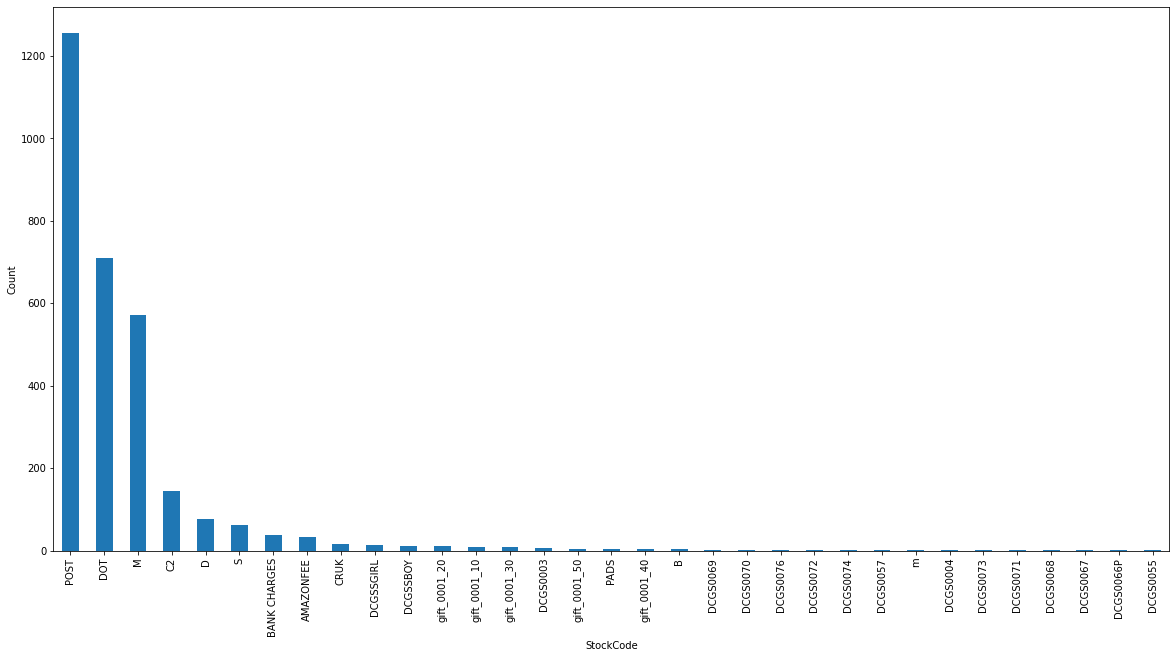

In [14]:
# 3B) Charting frequency of all non-numerical Stock-codes 

plt.figure(figsize=(20, 10))
df_stock_code_non_num['StockCode'].value_counts().plot(kind = 'bar')
plt.xlabel('StockCode')
plt.ylabel('Count')

<AxesSubplot:xlabel='count', ylabel='Description'>

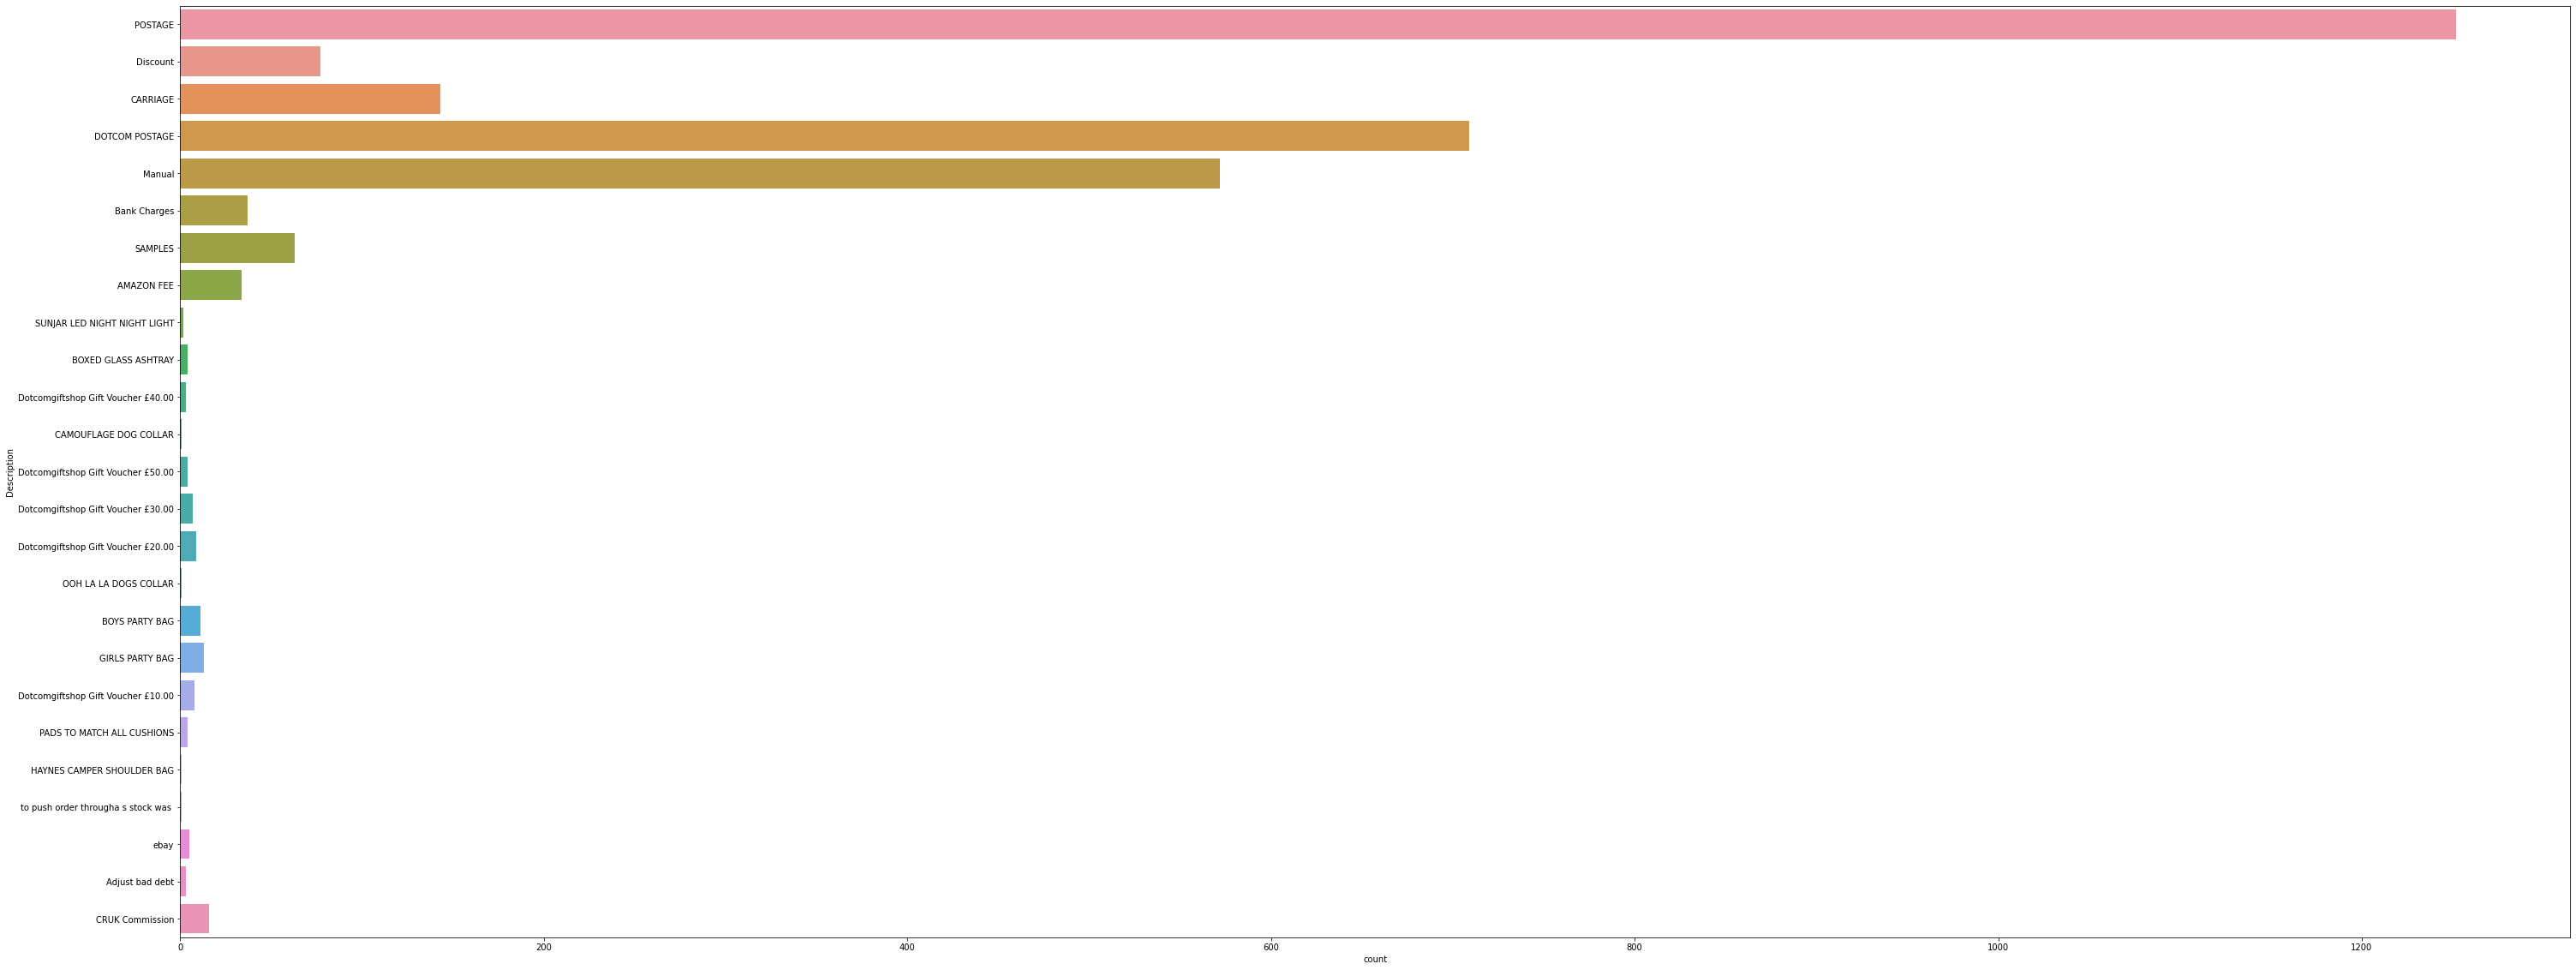

In [15]:
# 3C) Charting frequency of products with  non-numerical Stock-codes 

plt.figure(figsize=(50,20))
sns.countplot(y = df_stock_code_non_num['Description'])


## Checking for null values

In [16]:
# Finding total number of nulls for each column
data.isnull().sum()

# Found 1454 nulls in Description and 135080 in CustomerID

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Month               0
MonthYear           0
dtype: int64

### [Description] = null

In [17]:
# Creating filtered dataframe -> [Description] = null

nan_desc_df = data[data['Description'].isnull()]

nan_desc_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,2010,12,12/2010
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,2010,12,12/2010
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,2010,12,12/2010
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,2010,12,12/2010
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010,12,12/2010
...,...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,2011,12,12/2011
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,2011,12,12/2011
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,2011,12,12/2011
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,2011,12,12/2011


In [18]:
# Nulls in [Description] are 1454/541908 -> 1/500 > Remove them as they wont affect the results significantly

pd.options.mode.chained_assignment = None
data.dropna(subset=['Description'], inplace=True)
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
Year                0
Month               0
MonthYear           0
dtype: int64

In [19]:
## [CustomerID] = null

In [20]:
# Creating filtered dataframe -> [CustomerID] = null

nan_cust_df = data[data['CustomerID'].isnull()]

nan_cust_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,12,12/2010
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,12,12/2010
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010,12,12/2010
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010,12,12/2010
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010,12,12/2010
...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011,12,12/2011
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011,12,12/2011
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,2011,12,12/2011
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,2011,12,12/2011


In [21]:
# Percentage of nulls[CustomerID]/total

round(len(nan_cust_df) / len(data) * 100, 2)

# The percentage is around 1/4 of the dataset, should not hastily delete them 

24.72

## Handling [CustomerID] nulls

<AxesSubplot:xlabel='MonthYear', ylabel='count'>

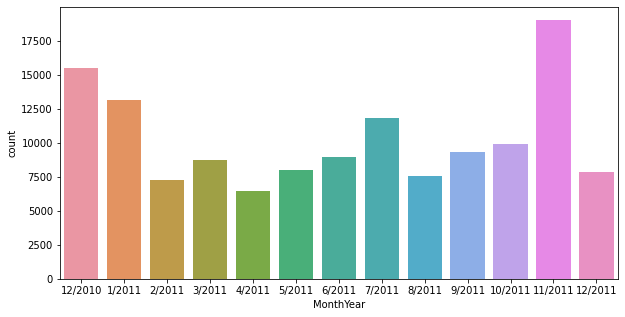

In [22]:
# Trying to find if there is a pattern depending on the month

plt.figure (figsize = (10,5))
sns.countplot(x ='MonthYear', data = nan_cust_df)

# No such pattern found

<AxesSubplot:xlabel='StockCode', ylabel='count'>

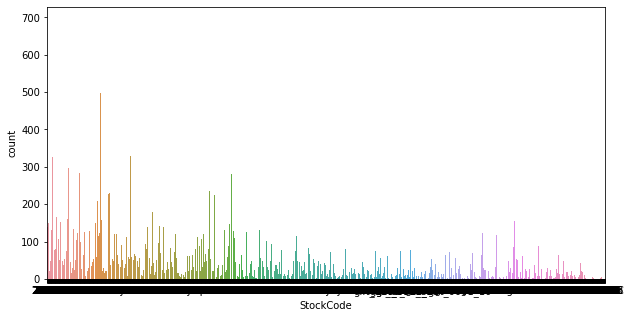

In [23]:
# Trying to find if there is a pattern depending on the month

plt.figure (figsize = (10,5))
sns.countplot(x ='StockCode', data = nan_cust_df)

# No such pattern found


## Checking for dupes

In [24]:
# Showing all dupes

data[data.duplicated()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010,12,12/2010
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2010,12,12/2010
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2010,12,12/2010
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2010,12,12/2010
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2010,12,12/2010
...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,2011,12,12/2011
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2011,12,12/2011
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,2011,12,12/2011
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2011,12,12/2011


In [25]:
# Counting all dupes

len(data[data.duplicated()])

5268

In [26]:
# Removing all dupes

data = data.drop_duplicates()
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthYear


## Replacing illegal values 

In [27]:
# Replacing negative values with 0
data['Quantity'] = data['Quantity'].mask(data['Quantity'] < 0, 0)
data['Quantity'].describe()


count    535187.000000
mean         10.486936
std         155.969169
min           0.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [28]:
export = data.to_csv(r'C:\Users\Θοδωρής\Downloads\clean_data24.csv')
